In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

# Tesla Dataset


## Importing Dataset


In [81]:
path = '/content/drive/MyDrive/III Year I SEM/EML/Lab/Datasets/TSLA.csv'
data = pd.read_csv(path)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


## Cleaning the Dataset

In [82]:
#printing the columns and rows
data.shape

(2416, 7)

In [83]:
#null values
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [84]:
#info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


Summary:

    Date is the only column which has an object datatype. So we apply one hot encoding on the Date column and make it into a numerical datatype

In [85]:
#Printing the top 5 rows of the dataset
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [86]:
#printing the categorical datatype row
data['Date']

0       2010-06-29
1       2010-06-30
2       2010-07-01
3       2010-07-02
4       2010-07-06
           ...    
2411    2020-01-28
2412    2020-01-29
2413    2020-01-30
2414    2020-01-31
2415    2020-02-03
Name: Date, Length: 2416, dtype: object

In [87]:
#Splitting Date into 3 different columns
data[['Year','Month','Date']] = data['Date'].str.split('-',expand=True)
data

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month
0,29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,2010,06
1,30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,2010,06
2,01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,2010,07
3,02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,2010,07
4,06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,2010,07
...,...,...,...,...,...,...,...,...,...
2411,28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500,2020,01
2412,29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500,2020,01
2413,30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700,2020,01
2414,31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300,2020,01


In [88]:
#Printing shape of the new dataset
data.shape

(2416, 9)

In [89]:
data[['Year','Month','Date']] = data[['Year','Month','Date']].astype(int)

In [90]:
data['class0'] = data['Open']>data['Close']
data

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,class0
0,29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,2010,6,False
1,30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,2010,6,True
2,1,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,2010,7,True
3,2,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,2010,7,True
4,6,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,2010,7,True
...,...,...,...,...,...,...,...,...,...,...
2411,28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500,2020,1,True
2412,29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500,2020,1,False
2413,30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700,2020,1,False
2414,31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300,2020,1,False


In [91]:
data['class0'].unique()

array([False,  True])

In [92]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,class0
0,29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,2010,6,False
1,30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,2010,6,True
2,1,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,2010,7,True
3,2,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,2010,7,True
4,6,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,2010,7,True
...,...,...,...,...,...,...,...,...,...,...
2411,28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500,2020,1,True
2412,29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500,2020,1,False
2413,30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700,2020,1,False
2414,31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300,2020,1,False


In [93]:
data['class0'] = data['class0'].astype(int)

In [94]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,class0
0,29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300,2010,6,0
1,30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100,2010,6,1
2,1,25.000000,25.920000,20.270000,21.959999,21.959999,8218800,2010,7,1
3,2,23.000000,23.100000,18.709999,19.200001,19.200001,5139800,2010,7,1
4,6,20.000000,20.000000,15.830000,16.110001,16.110001,6866900,2010,7,1
...,...,...,...,...,...,...,...,...,...,...
2411,28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500,2020,1,1
2412,29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500,2020,1,0
2413,30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700,2020,1,0
2414,31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300,2020,1,0


In [95]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [97]:
X_train

array([[1.00000000e+01, 1.61449997e+02, 1.67500000e+02, ...,
        8.96780000e+06, 2.01300000e+03, 9.00000000e+00],
       [1.40000000e+01, 2.35289993e+02, 2.36940002e+02, ...,
        8.28970000e+06, 2.01400000e+03, 3.00000000e+00],
       [2.20000000e+01, 2.76000000e+01, 2.80499990e+01, ...,
        1.00940000e+06, 2.01100000e+03, 1.20000000e+01],
       ...,
       [1.10000000e+01, 1.24879997e+02, 1.26089996e+02, ...,
        7.48360000e+06, 2.01300000e+03, 7.00000000e+00],
       [2.20000000e+01, 1.70500000e+02, 1.77779999e+02, ...,
        1.13867000e+07, 2.01300000e+03, 1.00000000e+01],
       [2.30000000e+01, 2.45850006e+02, 2.50889999e+02, ...,
        6.26290000e+06, 2.01700000e+03, 1.00000000e+00]])

In [98]:
print('X_train:', np.shape(X_train))
print('y_train:', np.shape(y_train))
print('X_test:', np.shape(X_test))
print('y_test:', np.shape(y_test))

X_train: (1691, 9)
y_train: (1691,)
X_test: (725, 9)
y_test: (725,)


# Standard Scalar

In [99]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression


In [100]:
from sklearn.linear_model import LogisticRegression
classifier7 = LogisticRegression()
classifier7.fit(X_train,y_train)

LogisticRegression()

# Prediction


In [101]:
y_pred7 = classifier7.predict(X_test)
print(np.concatenate((y_pred7.reshape(len(y_pred7),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 0]
 [1 1]
 ...
 [1 1]
 [1 0]
 [0 0]]


## confusion matrix, accuracy, roc-auc score

In [102]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
cm7 = confusion_matrix(y_test, y_pred7)
print(cm7)

[[291  68]
 [ 24 342]]


# Visualization

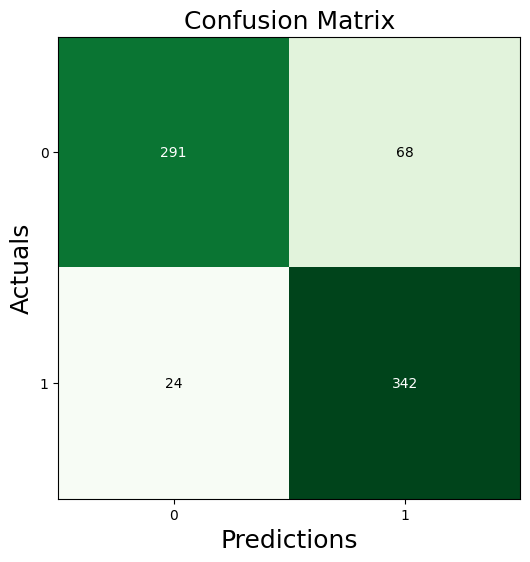

In [103]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm7, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Accuracy

In [104]:
logreg=accuracy_score(y_test,y_pred7)
logreg

0.8731034482758621

### AUC-ROC

In [105]:
roc_auc_score(y_test, y_pred7)

0.8725055938627334

## Metrics

In [106]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_test, y_pred7))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86       359
           1       0.83      0.93      0.88       366

    accuracy                           0.87       725
   macro avg       0.88      0.87      0.87       725
weighted avg       0.88      0.87      0.87       725



In [107]:

from sklearn.model_selection import GridSearchCV
parameters_lr = [{'penalty':['l1','l2'],'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}]
grid_search_lr = GridSearchCV(estimator = classifier7, param_grid = parameters_lr, scoring = 'accuracy', cv = 10, n_jobs = -1)
grid_search_lr.fit(X_train, y_train)
best_accuracy_lr = grid_search_lr.best_score_
best_paramaeter_lr = grid_search_lr.best_params_
print("Best Accuracy of LR: {:.2f} %".format(best_accuracy_lr.mean()*100))
print("Best Parameter of LR:", best_paramaeter_lr)

Best Accuracy of LR: 99.05 %
Best Parameter of LR: {'C': 1000, 'penalty': 'l2'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv